In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.preprocessing import StandardScaler
import os
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

In [2]:
df1=pd.read_csv("database.csv")

In [3]:
Y = df1.iloc[:,25:28]
X = df1.iloc[:,:8]
Y.head()

,q_abs,q_sca,g
0,0.11691,0.000389,0.003798
1,0.15300,0.001005,0.008979
2,0.20060,0.002514,0.022970
3,0.23162,0.004187,0.037044
4,0.25746,0.005988,0.051049


In [4]:
train_set=df1[(df1['fraction_of_coating']<40) | (df1['fraction_of_coating']>50)]
test_set=df1[(df1['fraction_of_coating']==40) | (df1['fraction_of_coating']==50)]
test_set.shape


(1580, 36)

In [5]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

In [6]:
scaling_x=StandardScaler()
#scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
#Y_train=scaling_y.fit_transform(Y_train)

Hyperparameters:
1. No of hideen layers
2. No of neurons in hidden layers
3. Learning rate

In [10]:
def build_model(hp):
    model=keras.Sequential()
    
    for i in range(hp.Int('num_layers', 3,10)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=256,
                                           step=32),
                              activation='relu'))
        model.add(layers.Dense(3, activation='linear'))
        model.compile(optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_percentage_error',
        metrics=['mean_absolute_percentage_error'])
        
    return model
        
    
    

In [11]:
tuner=RandomSearch(build_model,
                  objective='mean_absolute_percentage_error',
                  max_trials=8,
                  executions_per_trial=3,
                   directory= 'project1',
                   project_name='fraction_of_coating_40_50'
                  )

In [12]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}


In [13]:
tuner.search(X_train, Y_train, epochs=200)

Trial 5 Complete [00h 03m 03s]
mean_absolute_percentage_error: 19.752186457316082

Best mean_absolute_percentage_error So Far: 2.6286720434824624
Total elapsed time: 00h 15m 22s

Search: Running Trial #6

Hyperparameter    |Value             |Best Value So Far 
num_layers        |9                 |3                 
units_0           |96                |224               
learning_rate     |0.001             |0.0001            
units_1           |160               |32                
units_2           |192               |192               
units_3           |192               |96                
units_4           |224               |128               
units_5           |224               |224               
units_6           |128               |224               
units_7           |160               |128               
units_8           |160               |64                

Epoch 1/200
258/258 [==============================] - 1s 2ms/step - loss: 73.1351 - mean_absolute_percentage_

258/258 [==============================] - 0s 2ms/step - loss: 19.2998 - mean_absolute_percentage_error: 19.2998
Epoch 60/200
258/258 [==============================] - 0s 1ms/step - loss: 19.4250 - mean_absolute_percentage_error: 19.4250
Epoch 61/200
258/258 [==============================] - 0s 1ms/step - loss: 19.4598 - mean_absolute_percentage_error: 19.4598
Epoch 62/200
258/258 [==============================] - 0s 2ms/step - loss: 19.2161 - mean_absolute_percentage_error: 19.2161
Epoch 63/200
258/258 [==============================] - 0s 2ms/step - loss: 19.2392 - mean_absolute_percentage_error: 19.2392
Epoch 64/200
258/258 [==============================] - 0s 1ms/step - loss: 19.3879 - mean_absolute_percentage_error: 19.3879
Epoch 65/200
258/258 [==============================] - 0s 1ms/step - loss: 19.8845 - mean_absolute_percentage_error: 19.8845
Epoch 66/200
258/258 [==============================] - 0s 1ms/step - loss: 19.0564 - mean_absolute_percentage_error: 19.0564
Epoch

258/258 [==============================] - 0s 2ms/step - loss: 18.4152 - mean_absolute_percentage_error: 18.4152
Epoch 188/200
258/258 [==============================] - 0s 1ms/step - loss: 18.3959 - mean_absolute_percentage_error: 18.3959
Epoch 189/200
258/258 [==============================] - 0s 1ms/step - loss: 18.4009 - mean_absolute_percentage_error: 18.4009
Epoch 190/200
258/258 [==============================] - 0s 1ms/step - loss: 18.3930 - mean_absolute_percentage_error: 18.3930
Epoch 191/200
258/258 [==============================] - 0s 1ms/step - loss: 18.3445 - mean_absolute_percentage_error: 18.3445
Epoch 192/200
258/258 [==============================] - 0s 1ms/step - loss: 18.3794 - mean_absolute_percentage_error: 18.3794
Epoch 193/200
258/258 [==============================] - 0s 1ms/step - loss: 18.5773 - mean_absolute_percentage_error: 18.5773
Epoch 194/200
258/258 [==============================] - 0s 1ms/step - loss: 18.4137 - mean_absolute_percentage_error: 18.413

KeyboardInterrupt: 

In [14]:
tuner.results_summary()

Results summary
Results in project1\fraction_of_coating_40_50
Showing 10 best trials
Objective(name='mean_absolute_percentage_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 3
units_0: 224
learning_rate: 0.0001
units_1: 32
units_2: 192
units_3: 96
units_4: 128
units_5: 224
units_6: 224
units_7: 128
units_8: 64
Score: 2.6286720434824624
Trial summary
Hyperparameters:
num_layers: 6
units_0: 64
learning_rate: 0.0001
units_1: 128
units_2: 160
units_3: 192
units_4: 224
units_5: 224
units_6: 224
units_7: 128
units_8: 224
Score: 5.309459368387858
Trial summary
Hyperparameters:
num_layers: 6
units_0: 160
learning_rate: 0.01
units_1: 96
units_2: 224
units_3: 32
units_4: 192
units_5: 96
units_6: 96
units_7: 192
units_8: 160
Score: 19.752186457316082
Trial summary
Hyperparameters:
num_layers: 9
units_0: 160
learning_rate: 0.01
units_1: 224
units_2: 96
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 23.124784469604492
Trial summary
Hyperparameters

In [7]:
NN_model2 = Sequential()

# The Input Layer :
NN_model2.add(Dense(192, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model2.add(Dense(224, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(192, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(96, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(224, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(224, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model2.add(Dense(3, kernel_initializer='normal',activation='linear'))


# Compile the network :
NN_model2.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['accuracy'])
NN_model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 192)               1728      
_________________________________________________________________
dense_1 (Dense)              (None, 224)               43232     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                7200      
_________________________________________________________________
dense_3 (Dense)              (None, 192)               6336      
_________________________________________________________________
dense_4 (Dense)              (None, 96)                18528     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               12416     
_________________________________________________________________
dense_6 (Dense)              (None, 224)               2

In [8]:
filepath="fraction_of_coating_40_50/Weights-{epoch:03d}--{val_loss:.5f}.hdf5"

checkpoint = ModelCheckpoint(filepath, verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

In [9]:
# # patient early stopping
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

In [10]:
log_csv=CSVLogger('fraction_of_coating_40_50_loss_logs.csv', separator=',', append=False)

In [11]:
callback_list=[checkpoint, es, log_csv]

In [12]:
history= NN_model2.fit(X_train, Y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callback_list)
#history= NN_model.fit(X_train, Y_train, epochs=7, batch_size=32, validation_split = 0.2)

Epoch 1/500
200/207 [===========================>..] - ETA: 0s - loss: 48.5396 - accuracy: 0.8350
Epoch 00001: val_loss improved from inf to 25.94093, saving model to fraction_of_coating_40_50\Weights-001--25.94093.hdf5
207/207 [==============================] - 1s 3ms/step - loss: 47.9577 - accuracy: 0.8355 - val_loss: 25.9409 - val_accuracy: 0.9618
Epoch 2/500
199/207 [===========================>..] - ETA: 0s - loss: 26.0744 - accuracy: 0.8552
Epoch 00002: val_loss did not improve from 25.94093
207/207 [==============================] - 0s 2ms/step - loss: 26.2169 - accuracy: 0.8564 - val_loss: 32.7970 - val_accuracy: 0.9618
Epoch 3/500
194/207 [===========================>..] - ETA: 0s - loss: 25.4433 - accuracy: 0.8574
Epoch 00003: val_loss improved from 25.94093 to 25.52165, saving model to fraction_of_coating_40_50\Weights-003--25.52165.hdf5
207/207 [==============================] - 1s 3ms/step - loss: 25.4562 - accuracy: 0.8564 - val_loss: 25.5216 - val_accuracy: 0.9618
Epoch 

191/207 [==========================>...] - ETA: 0s - loss: 6.1366 - accuracy: 0.9756
Epoch 00026: val_loss did not improve from 10.21615
207/207 [==============================] - 0s 2ms/step - loss: 6.1580 - accuracy: 0.9748 - val_loss: 13.5993 - val_accuracy: 0.9509
Epoch 27/500
201/207 [============================>.] - ETA: 0s - loss: 6.7395 - accuracy: 0.9787
Epoch 00027: val_loss did not improve from 10.21615
207/207 [==============================] - 0s 2ms/step - loss: 6.7309 - accuracy: 0.9786 - val_loss: 13.3427 - val_accuracy: 0.9303
Epoch 28/500
185/207 [=========================>....] - ETA: 0s - loss: 5.8201 - accuracy: 0.9848
Epoch 00028: val_loss did not improve from 10.21615
207/207 [==============================] - 0s 2ms/step - loss: 5.7742 - accuracy: 0.9848 - val_loss: 12.2184 - val_accuracy: 0.9709
Epoch 29/500
199/207 [===========================>..] - ETA: 0s - loss: 5.0827 - accuracy: 0.9881
Epoch 00029: val_loss did not improve from 10.21615
207/207 [========

Epoch 83/500
187/207 [==========================>...] - ETA: 0s - loss: 3.4489 - accuracy: 0.9913
Epoch 00083: val_loss did not improve from 6.35743
207/207 [==============================] - 1s 2ms/step - loss: 3.4918 - accuracy: 0.9914 - val_loss: 8.7205 - val_accuracy: 0.9709
Epoch 84/500
190/207 [==========================>...] - ETA: 0s - loss: 3.5137 - accuracy: 0.9936
Epoch 00084: val_loss did not improve from 6.35743
207/207 [==============================] - 1s 2ms/step - loss: 3.4474 - accuracy: 0.9938 - val_loss: 6.8910 - val_accuracy: 0.9770
Epoch 85/500
187/207 [==========================>...] - ETA: 0s - loss: 3.1317 - accuracy: 0.9928
Epoch 00085: val_loss did not improve from 6.35743
207/207 [==============================] - 1s 2ms/step - loss: 3.1155 - accuracy: 0.9933 - val_loss: 7.0707 - val_accuracy: 0.9939
Epoch 86/500
197/207 [===========================>..] - ETA: 0s - loss: 3.8046 - accuracy: 0.9933
Epoch 00086: val_loss did not improve from 6.35743
207/207 [==

Epoch 112/500
197/207 [===========================>..] - ETA: 0s - loss: 3.3501 - accuracy: 0.9949
Epoch 00112: val_loss did not improve from 5.57394
207/207 [==============================] - 0s 2ms/step - loss: 3.3310 - accuracy: 0.9950 - val_loss: 8.3391 - val_accuracy: 0.9606
Epoch 113/500
189/207 [==========================>...] - ETA: 0s - loss: 2.9072 - accuracy: 0.9944
Epoch 00113: val_loss did not improve from 5.57394
207/207 [==============================] - 1s 2ms/step - loss: 2.8756 - accuracy: 0.9945 - val_loss: 6.9780 - val_accuracy: 0.9855
Epoch 114/500
186/207 [=========================>....] - ETA: 0s - loss: 3.2416 - accuracy: 0.9946
Epoch 00114: val_loss did not improve from 5.57394
207/207 [==============================] - 1s 2ms/step - loss: 3.3837 - accuracy: 0.9947 - val_loss: 7.2916 - val_accuracy: 0.9867
Epoch 115/500
192/207 [==========================>...] - ETA: 0s - loss: 3.6248 - accuracy: 0.9937
Epoch 00115: val_loss did not improve from 5.57394
207/207

199/207 [===========================>..] - ETA: 0s - loss: 2.7703 - accuracy: 0.9939
Epoch 00170: val_loss did not improve from 5.57394
207/207 [==============================] - 0s 2ms/step - loss: 2.7681 - accuracy: 0.9938 - val_loss: 7.5571 - val_accuracy: 0.9891
Epoch 171/500
189/207 [==========================>...] - ETA: 0s - loss: 2.7441 - accuracy: 0.9952
Epoch 00171: val_loss did not improve from 5.57394
207/207 [==============================] - 1s 2ms/step - loss: 2.7319 - accuracy: 0.9950 - val_loss: 7.9777 - val_accuracy: 0.9909
Epoch 172/500
202/207 [============================>.] - ETA: 0s - loss: 2.9846 - accuracy: 0.9941
Epoch 00172: val_loss did not improve from 5.57394
207/207 [==============================] - 1s 3ms/step - loss: 2.9744 - accuracy: 0.9941 - val_loss: 7.2096 - val_accuracy: 0.9885
Epoch 173/500
183/207 [=========================>....] - ETA: 0s - loss: 2.6900 - accuracy: 0.9952
Epoch 00173: val_loss did not improve from 5.57394
207/207 [============

In [13]:
# latest=tf.train.latest_checkpoint(checkpoint_dir)
weights_file = 'fraction_of_coating_40_50/Weights-111--5.57394.hdf5' # choose the best checkpoint 
NN_model2.load_weights(weights_file) # load it
NN_model2.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])

In [14]:
NN_model2.save('fraction_of_coating_40_50_model.h5')

Train loss: 3.255, Test loss: 4.066


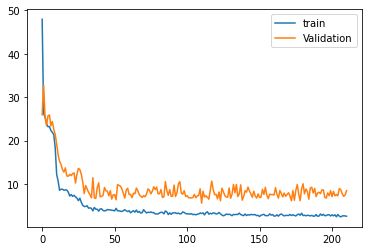

In [15]:
# evaluate the model
train_loss, train_acc = NN_model2.evaluate(X_train, Y_train, verbose=0)
test_loss, test_acc = NN_model2.evaluate(X_test, Y_test, verbose=0)
print('Train loss: %.3f, Test loss: %.3f' % (train_loss, test_loss))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [16]:
Y_pred = NN_model2.predict(X_test)

In [17]:
error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')   
print('Mean absolute percentage error on test set: ', error)

Mean absolute percentage error on test set:  [0.02922553 0.05432222 0.03843735]
